In [1]:
'''
Pattern Analysis, Statistical Modeling and Computational Learning
https://pjreddie.com/projects/pascal-voc-dataset-mirror/
There are two different competition/research datasets, from 2007 and 2012. We'll be using the 2007 version
we are using the python 3 standard library pathlib for our paths and file access
as well as the images, there are also annotations - bounding boxes showing where each object is. 
These were hand labeled. The original version were in XML
'''


"\nPattern Analysis, Statistical Modeling and Computational Learning\nhttps://pjreddie.com/projects/pascal-voc-dataset-mirror/\nThere are two different competition/research datasets, from 2007 and 2012. We'll be using the 2007 version\nwe are using the python 3 standard library pathlib for our paths and file access\nas well as the images, there are also annotations - bounding boxes showing where each object is. \nThese were hand labeled. The original version were in XML\n"

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
#torch.cuda.set_device(3)

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
#使用pathlib
PATH = Path('C:/input/Fast_AI/pascal')
list(PATH.iterdir()) # 返回全部文件

[WindowsPath('C:/input/Fast_AI/pascal/models'),
 WindowsPath('C:/input/Fast_AI/pascal/pascal_test2007.json'),
 WindowsPath('C:/input/Fast_AI/pascal/pascal_train2007.json'),
 WindowsPath('C:/input/Fast_AI/pascal/pascal_train2012.json'),
 WindowsPath('C:/input/Fast_AI/pascal/pascal_val2007.json'),
 WindowsPath('C:/input/Fast_AI/pascal/pascal_val2012.json'),
 WindowsPath('C:/input/Fast_AI/pascal/PASCAL_VOC'),
 WindowsPath('C:/input/Fast_AI/pascal/tmp'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtest_06-Nov-2007'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007')]

In [5]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys() # annotations - bounding boxes

dict_keys(['images', 'type', 'annotations', 'categories'])

In [6]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories'] # 字符串赋值给变量
#trn_j['images'][:5]
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [7]:
trn_j[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [8]:
trn_j[CATEGORIES][:4]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'}]

In [9]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox' #用常量代替字符串
cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]} 
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [10]:
list((PATH/'VOCtrainval_06-Nov-2007/VOCdevkit/voc2007').iterdir())

[WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/Annotations'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/ImageSets'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/JPEGImages'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/SegmentationClass'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/SegmentationObject')]

In [11]:
JPEGS = 'VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/JPEGImages' # 训练数据集

In [12]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/JPEGImages/000005.jpg'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/JPEGImages/000007.jpg'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/JPEGImages/000009.jpg'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/JPEGImages/000012.jpg'),
 WindowsPath('C:/input/Fast_AI/pascal/VOCtrainval_06-Nov-2007/VOCdevkit/voc2007/JPEGImages/000016.jpg')]

In [13]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [14]:
def hw_bb(bb): return np.array([bb[1],bb[0],bb[3]+bb[1]-1,bb[2]+bb[0]-1]) # 返回bbox的定位

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID])) # id:[(bbox,class),(bbox,class)...]
len(trn_anno)

2501

In [15]:
trn_anno[8197] # [(array([186, 450, 226, 496]), 7), (array([176, 335, 206, 365]), 7)] 两个bbox

[(array([186, 450, 226, 496]), 7), (array([176, 335, 206, 365]), 7)]

In [16]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [17]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [18]:
cats[7]

'car'

In [19]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [20]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [21]:
#f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'
'expected: {}, actual: {}'.format(bb_voc,bb_hw(bb_fastai))

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

You can use Visual Studio Code (vscode - open source editor that comes with recent versions of Anaconda, or can be installed separately), or most editors and IDEs, to find out all about the open_image function. vscode things to know:

Command palette (Ctrl-shift-p)
Select interpreter (for fastai env)
Select terminal shell
Go to symbol (Ctrl-t)
Find references (Shift-F12)
Go to definition (F12)
Go back (alt-left)
View documentation
Hide sidebar (Ctrl-b)
Zen mode (Ctrl-k,z)

In [22]:
#im = open_image(IMG_PATH/im0_d[FILE_NAME])
im = open_image(str(IMG_PATH/im0_d[FILE_NAME]))

In [23]:
def show_img(im,figsize=None,ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax     

In [24]:
'''
Matplotlib's plt.subplots is a really useful wrapper for creating plots, regardless of 
whether you have more than one subplot. Note that Matplotlib has an optional object-oriented 
API which I think is much easier to understand and use 
(although few examples online use it!)
'''

"\nMatplotlib's plt.subplots is a really useful wrapper for creating plots, regardless of \nwhether you have more than one subplot. Note that Matplotlib has an optional object-oriented \nAPI which I think is much easier to understand and use \n(although few examples online use it!)\n"

In [25]:
def draw_outline(o,lw): # 划线
    o.set_path_effects([patheffects.Stroke(linewidth=lw,foreground='black'),patheffects.Normal()])

In [26]:
def draw_rect(ax,b):# 画长方形
    patch = ax.add_patch(patches.Rectangle(b[:2],*b[-2:],fill=False,edgecolor='white',lw=2))
    draw_outline(patch,4)

In [27]:
def draw_text(ax,xy,txt,sz=14):# 文字标注
    text = ax.text(*xy,txt,verticalalignment='top',color='white',fontsize=sz,weight='bold')
    draw_outline(text,1)

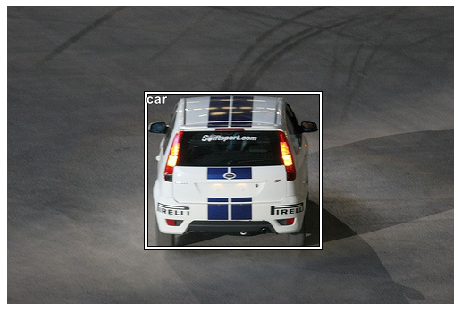

In [28]:
ax = show_img(im)
b = bb_hw(im0_a[0])
#%debug
#pdb.set_trace()
draw_rect(ax,b)
draw_text(ax,b[:2],cats[im0_a[1]])

In [29]:
def draw_im(im,ann): # 多个bbox
    ax = show_img(im,figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax,b)
        draw_text(ax,b[:2],cats[c],sz=16)

In [30]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(str(IMG_PATH/trn_fns[i]))
    print(im.shape)
    draw_im(im,im_a)

(364, 480, 3)


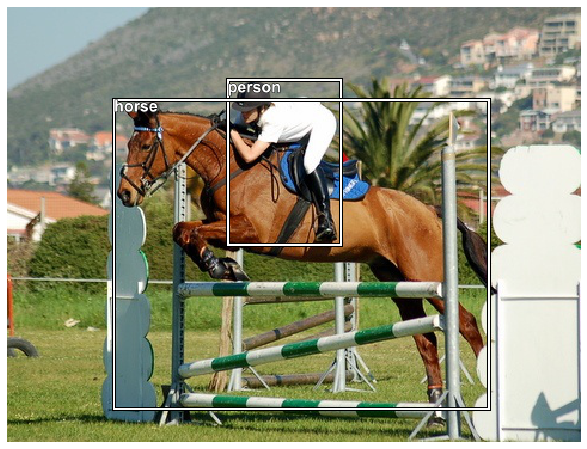

In [31]:
draw_idx(17)

In [32]:
# Largest item classifier

In [33]:
# 每幅图按照bbox大小描述，找到最大的
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b,key=lambda x:np.product(x[0][-2]-x[0][:2]),reverse=True)
    return b[0]

In [34]:
trn_lrg_anno = {a:get_lrg(b) for a,b in trn_anno.items()}

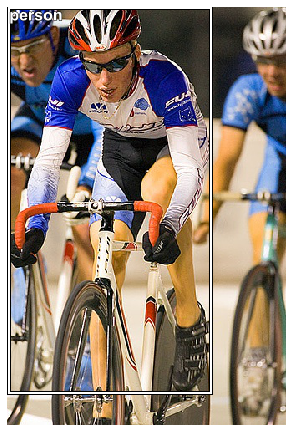

In [35]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax =show_img(open_image(str(IMG_PATH/trn_fns[23])),figsize=(5,10))
draw_rect(ax,b)
draw_text(ax,b[:2],cats[c],sz=16)

In [36]:
trn_lrg_anno[23]

(array([  1,   2, 461, 242]), 15)

In [37]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [38]:
# pandas创建一个文件名和类的csv文件
df = pd.DataFrame({'fn':[trn_fns[o] for o in trn_ids],
                  'cat':[cats[trn_lrg_anno[o][1]] for o in trn_ids]},columns=['fn','cat'])
df.to_csv(CSV,index=False)

In [39]:
f_model=resnet34
sz=224
bs=64

In [40]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

In [41]:
tfms = tfms_from_model(f_model,sz,aug_tfms=transforms_side_on,crop_type=CropType.NO)
md = ImageClassifierData.from_csv(str(PATH),str(JPEGS),str(CSV),tfms=tfms,bs=bs) # 以前参数是路径的字符串，现在是Path类型

In [42]:
x,y = next(iter(md.val_dl))

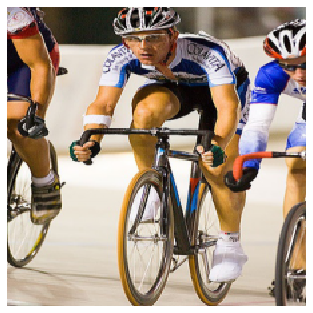

In [43]:
show_img(md.val_ds.denorm(to_np(x))[0])

In [44]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

In [45]:
@time
lrf=learn.lr_find(1e-5,100)

SyntaxError: invalid syntax (<ipython-input-45-5826ce4cf511>, line 2)

In [ ]:
learn.sched.plot()

In [ ]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [ ]:
lr = 2e-2

In [ ]:
learn.fit(lr, 1, cycle_len=1)

In [ ]:
lrs = np.array([lr/1000,lr/100,lr])

In [ ]:
learn.freeze_to(-2)

In [ ]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [ ]:
learn.summary()

In [ ]:
learn.freeze_to(-3)


In [ ]:
learn.fit(lrs,1,cycle_len=2)

In [ ]:
learn.save('reg4')

In [ ]:
learn.load('reg4')

In [ ]:
x,y = next(iter(md.trn_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

In [ ]:
preds

In [ ]:
fig,axes = plt.subplots(3,4,figsize=(12,8))
for i,ax in enumerate(axes.flat):
    ima = md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima,ax=ax)
    draw_rect(ax,b)
plt.tight_layout()

In [ ]:
#Bbox only

In [ ]:
BB_CSV = PATH/'tmp/bb.csv'

In [ ]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]
df = pd.DataFrame({'fn':[trn_fns[o] for o in trn_ids], 'bbox':bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV,index=False)

In [ ]:
BB_CSV.open().readlines()[:5]

In [ ]:
f_model=resnet34
sz=224
bs=64

In [ ]:
'''
continous=True, 回归问题，不使用one-hot编码而使用MSE
CropType.NO，我将长方形挤压到正方形，而不是中心裁剪，
'''
augs = [RandomFlip(),RandomRotate(30),RandomLighting(0.1,0.1)]

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(str(PATH), str(JPEGS), BB_CSV, tfms=tfms, continuous=True, bs=4)

In [ ]:
idx=3
fig,axes = plt.subplots(3,3,figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl)) #
    ima=md.val_ds.denorm(to_np(x))[idx]
    b=bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima,ax=ax)
    draw_rect(ax,b)

In [ ]:
next(iter(md.aug_dl))[0][0]

In [ ]:
# NO = 1,PIXEL = 2,COORD = 3,CLASS = 4, IntEnum类型
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(str(PATH), str(JPEGS), str(BB_CSV), tfms=tfms, continuous=True, bs=4)

In [ ]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [ ]:
# NO = 1,PIXEL = 2,COORD = 3,CLASS = 4, IntEnum类型
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(str(PATH), str(JPEGS), str(BB_CSV), tfms=tfms, continuous=True, bs=4)

In [ ]:
# fastai 可以使用custom_head在自己的模块前面，

In [ ]:
512*7*7

In [ ]:
head_reg4 = nn.Sequential(Flatten(),nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model,md,custom_head=head_reg4)
learn.opt_fn=optim.Adam
learn.crit=nn.L1Loss()

In [ ]:
learn.summary()

In [ ]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [ ]:
lr=2e-3

In [ ]:
lrs = np.array([lr/100,lr/10,lr])

In [ ]:
learn.freeze_to(-2)

In [ ]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [ ]:
learn.freeze_to(-3)

In [ ]:
learn.fit(lrs, 1, cycle_len=2)

In [ ]:
learn.save('reg4')

In [ ]:
learn.load('reg4')

In [ ]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

In [ ]:
#Single object detection

In [ ]:
f_model = resnet34
sz=224
bs=64
val_idxs = get_cv_idxs(len(trn_fns))

In [ ]:
len(val_idxs)

In [ ]:
tfms = tfms_from_model(f_model,sz,crop_type=CropType.NO,tfm_y=TfmType.COORD,aug_tfms=augs)
ms = ImageClassifierData.from_csv(PATH,JPEGS,BB_CSV,tfms=tfms,bs=bs,continous=True,val_idxs=val_idxx)

In [ ]:
md2 = ImageClassifierData.from_csv(PATH,JPEGS,CSV,tfms=tfms_from_model(f_model,sz))

In [ ]:
class ConcatLblDataset(Dataset):
    def __init__(self,ds,y2): self.ds,self.y2=ds,y2
    def __len__(self): return len(self.ds)
    def __getitem__(self,i):
        x,y = self.ds[i]
        return (x,(y,self.y2[i]))

In [ ]:
trn_ds2 = ConcatLblDataset(md.trn_ds,md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds,ms2.val_y)

In [ ]:
val_ds2[0][1]